## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and datam

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

path = r'/Users/priyankamittal/Desktop/Data Analytics/CareerFoundry/Immersion/Advance Analytics/Chocolate Bar Rating'

In [4]:
path = r'/Users/priyankamittal/Desktop/Data Analytics/CareerFoundry/Immersion/Advance Analytics/Chocolate Bar Rating'

In [46]:
df_cleaned = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Chocolate_cleaned.csv'))

In [47]:
df_cleaned.head()

Unnamed: 0 Company (if known)   Bar Origin   REF  Review Date  \
0           0           A. Morin  Agua Grande  1876         2016   
1           1           A. Morin        Kpime  1676         2015   
2           2           A. Morin       Atsane  1676         2015   
3           3           A. Morin        Akata  1680         2015   
4           4           A. Morin       Quilla  1704         2015   

   Cocoa Percent Company Location  Rating Bean Type Bean Origin  
0           0.63           France    3.75     Other    Sao Tome  
1           0.70           France    2.75     Other        Togo  
2           0.70           France    3.00     Other        Togo  
3           0.70           France    3.50     Other        Togo  
4           0.70           France    3.50     Other        Peru

### 2. Data cleaning

In [48]:
df_cleaned = df_cleaned.drop(columns = ['Unnamed: 0'], axis = 'columns')

In [49]:
df_cleaned.columns

Index(['Company (if known)', 'Bar Origin', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type',
       'Bean Origin'],
      dtype='object')

In [50]:
df_cleaned.rename(columns = {'Company (if known)': 'Company_name'}, inplace = True)

In [51]:
df_cleaned.columns

Index(['Company_name', 'Bar Origin', 'REF', 'Review Date', 'Cocoa Percent',
       'Company Location', 'Rating', 'Bean Type', 'Bean Origin'],
      dtype='object')

In [52]:
df_cleaned.rename(columns = {'Bar Origin' : 'Bar_origin', ' Review Date' : 'year', 'Cocoa Percent':'Cocoa_Percent', 'Company Location':'Company_Location', 'Bean Type':'Bean_Type','Bean Origin' : 'Bean_Origin'}, inplace  = True)

In [53]:
df_cleaned.columns

Index(['Company_name', 'Bar_origin', 'REF', 'Review Date', 'Cocoa_Percent',
       'Company_Location', 'Rating', 'Bean_Type', 'Bean_Origin'],
      dtype='object')

In [54]:
df_cleaned.rename(columns = {'Review Date': 'Year'}, inplace = True)

In [55]:
df_cleaned.columns

Index(['Company_name', 'Bar_origin', 'REF', 'Year', 'Cocoa_Percent',
       'Company_Location', 'Rating', 'Bean_Type', 'Bean_Origin'],
      dtype='object')

In [23]:
df.describe(include='all')

Company_name  Bar_origin          REF         Year  Cocoa_Percent  \
count          1795        1795  1795.000000  1795.000000    1795.000000   
unique          416        1039          NaN          NaN            NaN   
top            Soma  Madagascar          NaN          NaN            NaN   
freq             47          57          NaN          NaN            NaN   
mean            NaN         NaN  1035.904735  2012.325348       0.716983   
std             NaN         NaN   552.886365     2.927210       0.063231   
min             NaN         NaN     5.000000  2006.000000       0.420000   
25%             NaN         NaN   576.000000  2010.000000       0.700000   
50%             NaN         NaN  1069.000000  2013.000000       0.700000   
75%             NaN         NaN  1502.000000  2015.000000       0.750000   
max             NaN         NaN  1952.000000  2017.000000       1.000000   

       Company_Location       Rating Bean_Type Bean_Origin  
count              1795  1795.000000      1795        1795  
unique               60          NaN        41         100  
top              U.S.A.          NaN     Other   Venezuela  
freq                764          NaN       888         214  
mean                NaN     3.185933       NaN         NaN  
std                 NaN     0.478062       NaN         NaN  
min                 NaN     1.000000       NaN         NaN  
25%                 NaN     2.875000       NaN         NaN  
50%                 NaN     3.250000       NaN         NaN  
75%                 NaN     3.500000       NaN         NaN  
max                 NaN     5.000000       NaN         NaN

In [56]:
df_cleaned.Bean_Type.unique()

array(['Other', 'Criollo', 'Trinitario', 'Forastero (Arriba)',
       'Forastero', 'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [57]:
df_cleaned.isnull().sum()

Company_name        0
Bar_origin          0
REF                 0
Year                0
Cocoa_Percent       0
Company_Location    0
Rating              0
Bean_Type           0
Bean_Origin         0
dtype: int64

In [58]:
#check for mixed data type
for col in df_cleaned.columns.tolist():
  weird = (df_cleaned[[col]].applymap(type) != df_cleaned[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

In [59]:
dups = df_cleaned.duplicated()

In [60]:
df_cleaned.head(10)

Company_name      Bar_origin   REF  Year  Cocoa_Percent Company_Location  \
0     A. Morin     Agua Grande  1876  2016           0.63           France   
1     A. Morin           Kpime  1676  2015           0.70           France   
2     A. Morin          Atsane  1676  2015           0.70           France   
3     A. Morin           Akata  1680  2015           0.70           France   
4     A. Morin          Quilla  1704  2015           0.70           France   
5     A. Morin        Carenero  1315  2014           0.70           France   
6     A. Morin            Cuba  1315  2014           0.70           France   
7     A. Morin    Sur del Lago  1315  2014           0.70           France   
8     A. Morin  Puerto Cabello  1319  2014           0.70           France   
9     A. Morin         Pablino  1319  2014           0.70           France   

   Rating Bean_Type Bean_Origin  
0    3.75     Other    Sao Tome  
1    2.75     Other        Togo  
2    3.00     Other        Togo  
3    3.50     Other        Togo  
4    3.50     Other        Peru  
5    2.75   Criollo   Venezuela  
6    3.50     Other        Cuba  
7    3.50   Criollo   Venezuela  
8    3.75   Criollo   Venezuela  
9    4.00     Other        Peru

##### Extreme values checks

<Axes: xlabel='Cocoa_Percent', ylabel='Count'>

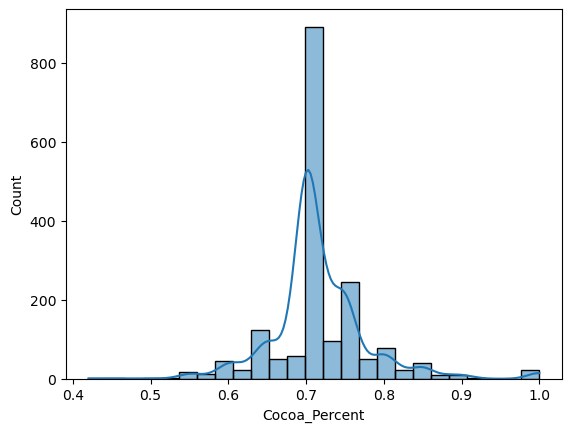

In [68]:
sns.histplot(df_cleaned['Cocoa_Percent'], bins=25, kde = True) # Shows extreme values

In [62]:
df_cleaned['Cocoa_Percent'].mean() # Check the mean

0.7169832869080781

In [63]:
df_cleaned['Cocoa_Percent'].mode() # Check the mode

0    0.7
Name: Cocoa_Percent, dtype: float64

In [64]:
df_cleaned['Cocoa_Percent'].median() # Check the median

0.7

Stats for 2nd Variable (Rating)


<Axes: xlabel='Rating', ylabel='Count'>

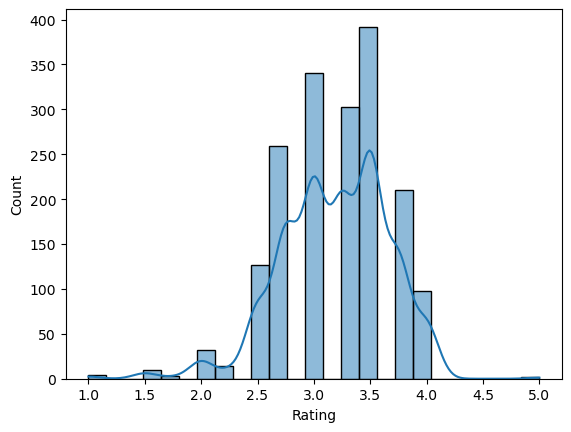

In [69]:
sns.histplot(df_cleaned['Rating'], bins=25, kde = True)

In [71]:
df_cleaned['Rating'].mean()

3.185933147632312

In [72]:
df_cleaned['Rating'].mode()

0    3.5
Name: Rating, dtype: float64

In [73]:
df_cleaned['Rating'].median()

3.25

## 3. Data prep for regression analysis


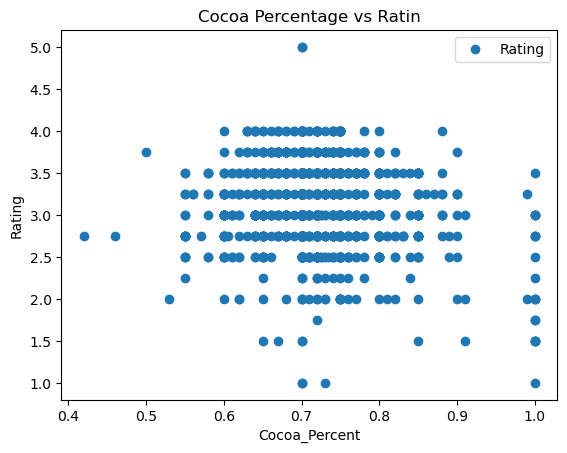

In [76]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_cleaned.plot(x = 'Cocoa_Percent' , y = 'Rating' ,  style = 'o')
plt.title("Cocoa Percentage vs Ratin")
plt.xlabel('Cocoa_Percent')
plt.ylabel('Rating')
plt.show()

## Hypothesis : Chocolate bars with higher cocoa percentage will have higher ratings


In [79]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_cleaned['Cocoa_Percent'].values.reshape(-1,1)
y = df_cleaned['Rating'].values.reshape(-1,1)

In [80]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]])

In [81]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [82]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

## 4. Regression analysis


In [91]:
# Create a regression object.

regression = LinearRegression()

In [92]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [94]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

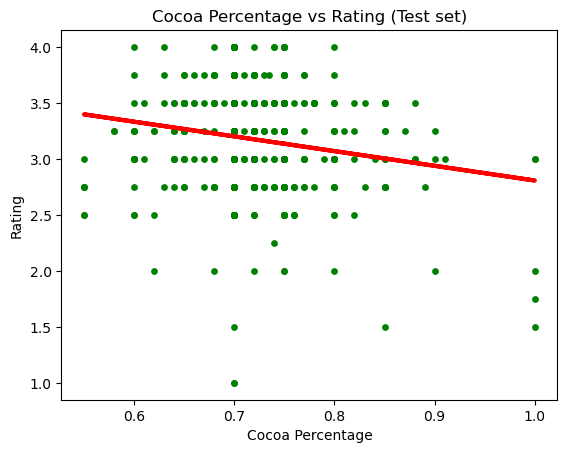

In [95]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percentage vs Rating (Test set)')
plot_test.xlabel('Cocoa Percentage')
plot_test.ylabel('Rating')
plot_test.show()

## The line does not fit well with the data since there are many data points that are far away from it.

In [96]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [97]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.3132551]]
Mean squared error:  0.20953513101526208
R2 score:  0.018110020461675203


In [98]:
y_predicted

array([[3.13545711],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.06979435],
       [3.39810813],
       [3.20111986],
       [3.13545711],
       [3.25365007],
       [3.26678262],
       [3.27991517],
       [3.20111986],
       [3.26678262],
       [3.20111986],
       [3.13545711],
       [3.06979435],
       [3.0041316 ],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.16172221],
       [3.39810813],
       [2.80714333],
       [3.33244537],
       [3.13545711],
       [3.13545711],
       [3.22738497],
       [3.20111986],
       [3.22738497],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.13545711],
       [3.20111986],
       [3.17485476],
       [3.27991517],
       [3.17485476],
       [3.20111986],
       [3.13545711],
       [3.26678262],
       [3.20111986],
       [3.39810813],
       [3.20111986],
       [3.33244537],
       [3.10919201],
       [3.135

In [99]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0     2.50   3.135457
1     2.75   3.174855
2     2.50   3.201120
3     3.25   3.201120
4     3.25   3.069794
5     2.75   3.398108
6     3.50   3.201120
7     2.50   3.135457
8     3.50   3.253650
9     3.50   3.266783
10    2.75   3.279915
11    3.50   3.201120
12    3.00   3.266783
13    3.50   3.201120
14    3.25   3.135457
15    2.75   3.069794
16    1.50   3.004132
17    3.00   3.174855
18    2.75   3.201120
19    3.75   3.201120
20    3.00   3.201120
21    3.50   3.161722
22    2.75   3.398108
23    3.00   2.807143
24    3.00   3.332445
25    3.00   3.135457
26    3.00   3.135457
27    3.50   3.227385
28    3.00   3.201120
29    3.75   3.227385

## Compare how the regression fits the training set


In [101]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [102]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [103]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.3132551]]
Mean squared error:  0.22774918296663343
R2 score:  0.02978424922646028


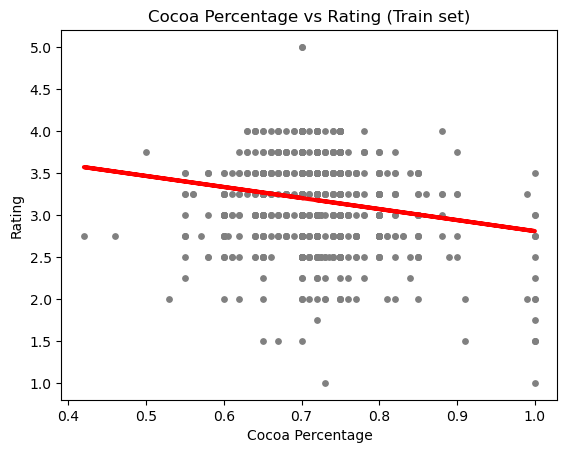

In [104]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa Percentage vs Rating (Train set)')
plot_test.xlabel('Cocoa Percentage')
plot_test.ylabel('Rating')
plot_test.show()

* The model fits the training set only slightly better than the test set.

* For both models, the R2 score is very low, which shows the the model is a poor fit and the relationship of the data variables is not purely linear.

## Bonus: performance improvement after removing outliers

In [106]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_cleaned[df_cleaned['Rating'] <=4] 

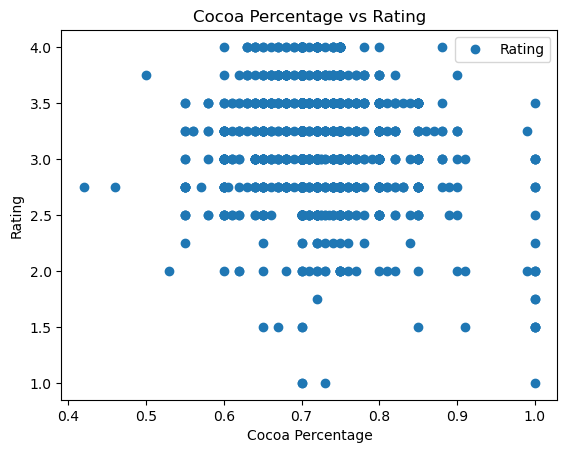

In [108]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Cocoa_Percent', y='Rating', style='o')  
plt.title('Cocoa Percentage vs Rating')  
plt.xlabel('Cocoa Percentage')  
plt.ylabel('Rating')  
plt.show()

In [111]:
# Reshape again.

X_2 = df_test['Cocoa_Percent'].values.reshape(-1,1)
y_2 = df_test['Rating'].values.reshape(-1,1)

In [112]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)


In [113]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [114]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [115]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [116]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.50440856]]
Mean squared error:  0.21270940898527138
R2 score:  -0.013664740470596959


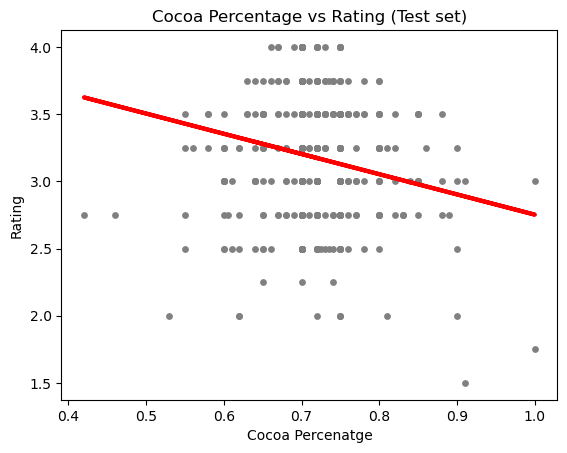

In [117]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Cocoa Percentage vs Rating (Test set)')
plot_test.xlabel('Cocoa Percenatge')
plot_test.ylabel('Rating')
plot_test.show()

In [118]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

Actual  Predicted
0     3.50   3.293578
1     3.50   3.128093
2     2.75   3.248446
3     3.75   3.203314
4     2.75   3.158182
5     3.50   3.278534
6     3.00   3.128093
7     3.75   3.173226
8     3.00   3.128093
9     3.25   3.203314
10    3.50   3.233402
11    3.00   3.128093
12    3.25   3.173226
13    3.50   3.203314
14    2.25   3.143138
15    2.50   3.203314
16    2.50   3.263490
17    3.50   3.203314
18    2.50   3.173226
19    2.75   3.203314
20    3.50   3.428975
21    2.75   3.203314
22    2.75   3.218358
23    3.25   3.098005
24    2.75   3.052873
25    3.50   3.143138
26    3.25   3.203314
27    3.50   3.052873
28    3.25   3.203314
29    3.75   3.233402

### Since our analysis does not prove to give us a linear relationship between the chosen variables and therefore can be concluded as inaccurate - we can therefore rule out our hypothesis that " Chocolate bars with higher cocoa percentage will have higher ratings".